# Thera Bank Personal Loan Campaign

## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Attribute Information: 
* ID: Customer ID 
* Age: Customer's age in completed years 
* Experience: #years of professional experience 
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code 
* Family: Family size of the customer 
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
* Mortgage: Value of house mortgage if any
* Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
* Securities Account: Does the customer have a securities account with the bank? 
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Does the customer use internet banking facilities? 
* Credit card: Does the customer use a credit card issued by the bank? 

# Exploratory Data Analysis

## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 50)
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
# Importing datasets
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Checking datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
# Statistical summary 
df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,61.0,63.0,65.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,36.0,38.0,41.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,145.0,170.0,193.00,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,4.3,6.0,8.00,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,200.0,272.0,431.01,635.0


In [6]:
# shape of the dataset
df.shape

(5000, 14)

In [7]:
# null values or incorrect imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Check if there are any negative values in the dataframe
if(sum(n < 0 for n in df.values.flatten()) > 0):
    df[df < 0] = 0

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

### 2.1 Number of unique in each column?

In [10]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### 2.2 Number of people with zero mortgage?

In [11]:
df['Mortgage'].isin([0]).sum()

3462

### 2.3 Number of people with zero credit card spending per month?

In [12]:
df['CCAvg'].isin([0]).sum()

106

### 2.4 Value counts of all categorical columns.

In [13]:
cat_df = df.copy()
categories = ['ID', 'ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
cat_df[categories] = df[categories].astype('category')

In [14]:
for i in list(cat_df.columns[cat_df.dtypes=='category']):   # checking value counts of all category type columns
        print(cat_df[i].value_counts())
        print()

5000    1
1670    1
1663    1
1664    1
1665    1
       ..
3334    1
3335    1
3336    1
3337    1
1       1
Name: ID, Length: 5000, dtype: int64

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
92694      1
94965      1
94970      1
91024      1
9307       1
Name: ZIP Code, Length: 467, dtype: int64

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [15]:
# looking at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.148894,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [16]:
df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
df = df.drop('ZIP Code', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### 2.5 Univariate and Bivariate

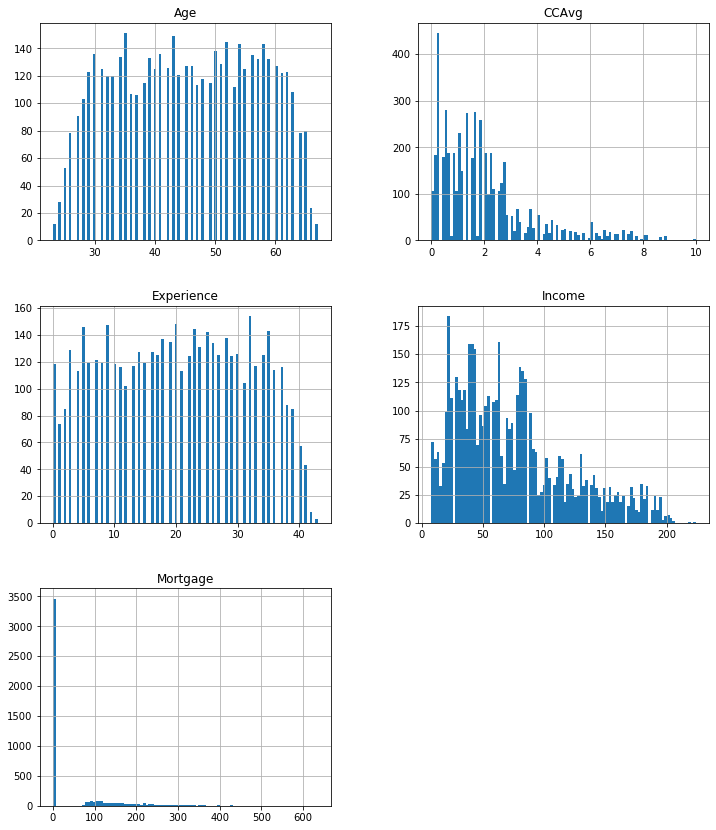

In [17]:
df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].hist(stacked=False, bins=100, figsize=(12,30), layout=(6,2));

In [18]:
# Correlation matrix
#df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].corr()
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


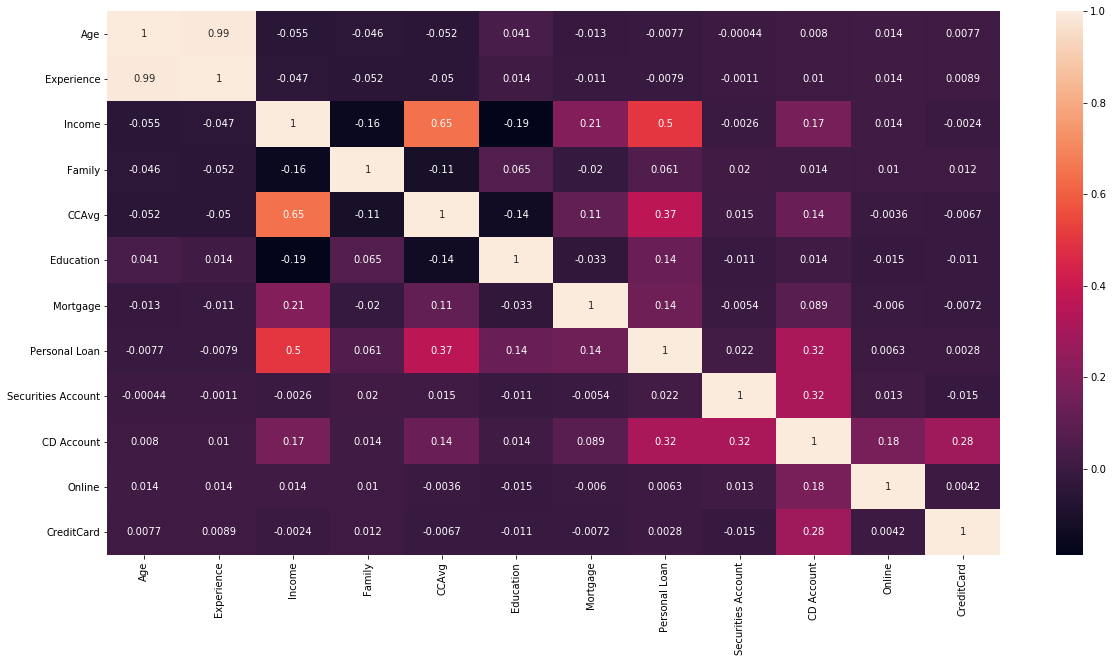

In [19]:
# Let's see the correlation matrix
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True);

### 2.6 Get data model ready

In [20]:
# Creating a dummy variable for the variable 'Family' and droping the first one.
fam = pd.get_dummies(df['Family'], prefix='Family')
df = pd.concat([df, fam], axis = 1)

# Creating a dummy variable for the variable 'Education' and droping the first one.
edu = pd.get_dummies(df['Education'], prefix='Education')
df = pd.concat([df, edu], axis = 1)

df = df.drop(['Family', 'Education'], 1)

In [21]:
ddf = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
normalized_df=(ddf-ddf.mean())/ddf.std()
df = df.drop(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], 1)
df = pd.concat([df,normalized_df],axis=1)
df.head()

,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Age,Experience,Income,CCAvg,Mortgage
0,0,1,0,0,0,0,0,0,1,1,0,0,-1.774239,-1.671223,-0.538175,-0.193366,-0.555468
1,0,1,0,0,0,0,0,1,0,1,0,0,-0.029521,-0.097863,-0.864023,-0.250586,-0.555468
2,0,0,0,0,0,1,0,0,0,1,0,0,-0.552936,-0.447499,-1.363657,-0.536683,-0.555468
3,0,0,0,0,0,1,0,0,0,0,1,0,-0.901880,-0.971952,0.569708,0.436047,-0.555468
4,0,0,0,0,1,0,0,0,1,0,1,0,-0.901880,-1.059361,-0.625068,-0.536683,-0.555468


In [22]:
## Define X and Y variables
X = df.drop('Personal Loan', axis=1)
y = df[['Personal Loan']]
X.head()

,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Age,Experience,Income,CCAvg,Mortgage
0,1,0,0,0,0,0,0,1,1,0,0,-1.774239,-1.671223,-0.538175,-0.193366,-0.555468
1,1,0,0,0,0,0,1,0,1,0,0,-0.029521,-0.097863,-0.864023,-0.250586,-0.555468
2,0,0,0,0,1,0,0,0,1,0,0,-0.552936,-0.447499,-1.363657,-0.536683,-0.555468
3,0,0,0,0,1,0,0,0,0,1,0,-0.901880,-0.971952,0.569708,0.436047,-0.555468
4,0,0,0,1,0,0,0,1,0,1,0,-0.901880,-1.059361,-0.625068,-0.536683,-0.555468


In [23]:
personal_loan = (sum(df['Personal Loan'])/len(df['Personal Loan'].index))*100
personal_loan

9.6

# Preparing the data to train a model

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [24]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [25]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Training and making predictions using a classification model

## 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [26]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_predict = logreg.predict(X_test)

In [28]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9645714285714285

Testing accuracy 0.9513333333333334

Confusion Matrix


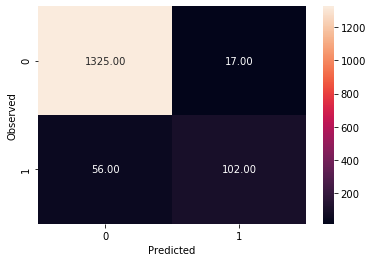

None

Recall: 0.6455696202531646

Precision: 0.8571428571428571

F1 Score: 0.7364620938628159

Roc Auc Score: 0.8164509800222602


In [29]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

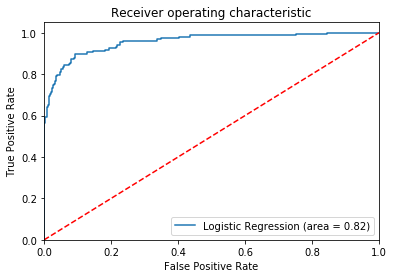

In [30]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [31]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()

Trainig accuracy 0.9645714285714285

Testing accuracy 0.9513333333333334



#### As can be seen above the Training accuracy is higher that testing accuracy, which leads to an overfitting.

#### Calculating Odds Ratio, Probability

In [32]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.106756
         Iterations 10


In [33]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [34]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.34,28.35,0.97,0.00
Income,3.06,21.40,0.96,0.00
CCAvg,0.36,1.43,0.59,0.00
CreditCard,-0.79,0.45,0.31,0.00
Online,-1.02,0.36,0.26,0.00


- These are dominant modes in the given model
- For example, Customers with CD Account have a 97% probability of given a personal loan

# Model evaluation

## 5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

#### Looking at the sns heatmap it can said that Age and Wxperience are highly correlated, but in logistic regression, we should ensure that there is no high correlation between independent variables therefore droping Age parameter might perform better. This will inturn improve the p-value, area under level of confidance(alpha).

In [35]:
# Dropping highly correlated values
X_test = X_test.drop(['Age'], 1)
X_train = X_train.drop(['Age'], 1)

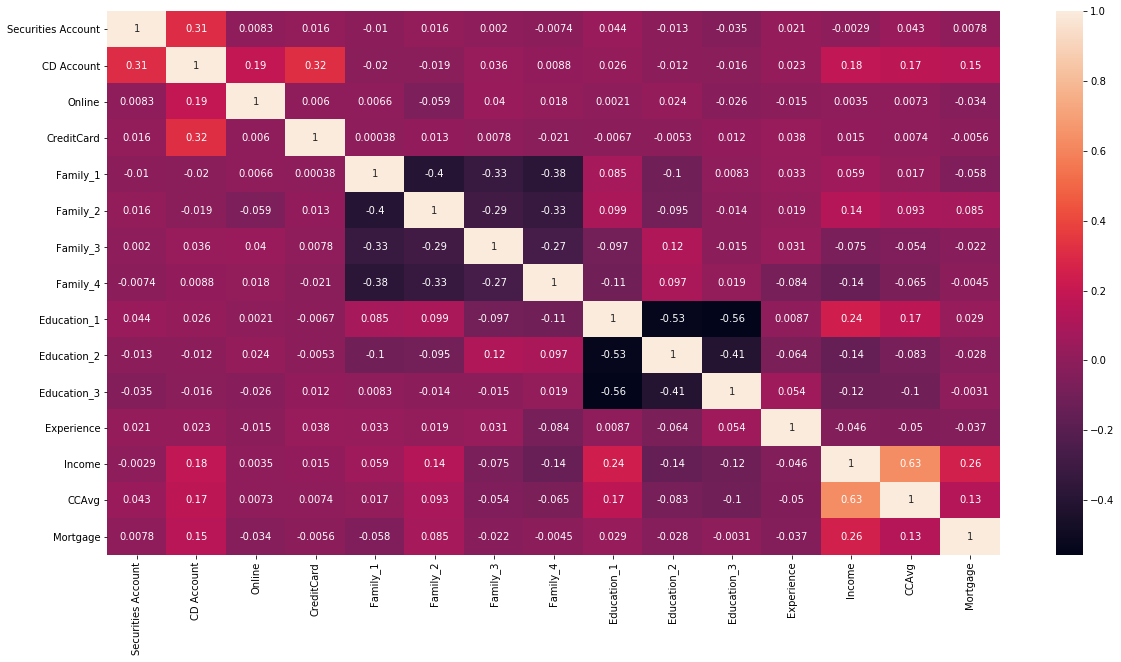

In [36]:
# Let's see the correlation matrix
plt.figure(figsize = (20, 10))
sns.heatmap(X_test.corr(), annot=True);

In [37]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9097142857142857

Testing accuracy 0.91


### Testing accuracy increased and model is not overfit anymore.

In [39]:
from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict (C=C, penalty=penalty)

clf = GridSearchCV(logistic, param_grid = hyperparameters, cv = 5, n_jobs=-1)
best_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


Trainig accuracy 0.9097142857142857

Testing accuracy 0.91

Confusion Matrix


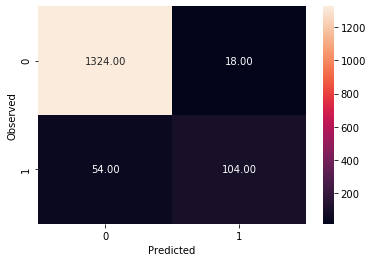

None

Recall: 0.6582278481012658

Precision: 0.8524590163934426

F1 Score: 0.7428571428571428

Roc Auc Score: 0.8224075157048804


In [40]:
y_predict = best_model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#### This is the best model after optimations. This gives the optimum point to take it as a cutoff probability between accuracy, sensitivity and specificity. Moreover the testing accuracy increased and model is not overfit anymore.

## 6. Give Business understanding of your model? (5 marks)

### Odds Ratio

In [46]:
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.35,28.37,0.97,0.00
Income,3.07,21.44,0.96,0.00
CCAvg,0.36,1.43,0.59,0.00
Experience,0.19,1.21,0.55,0.05
CreditCard,-0.79,0.46,0.31,0.00
Online,-1.02,0.36,0.26,0.00


#### * Looking at the odds ratio above the retail marketing department may devise campaigns with better target marketing to increase the success ration with a minimal budget.
#### * The customers with CD Account have accepted the personal that was offered to them in the earlier campaign.
#### * The testing accuracy higher than training accuracy ensures that the model is not an overfit.